## 1. Maximization of Functions using Gradient Descent

**Task**:
- (a) Maximize the function $f(x) = -x^4 + 4x^2 - 2x + 1$, where $f: \mathbb{R} \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and plot the convergence over iterations.
- (b) Maximize the function $f(x, y, z) = -x^2 - y^2 - z^2 + 2xy - yz + 3z$, where $f: \mathbb{R}^3 \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and visualize the optimization path.


### a)

Maximum value of f(x): 7.943973541259766 at x = -1.5256868600845337


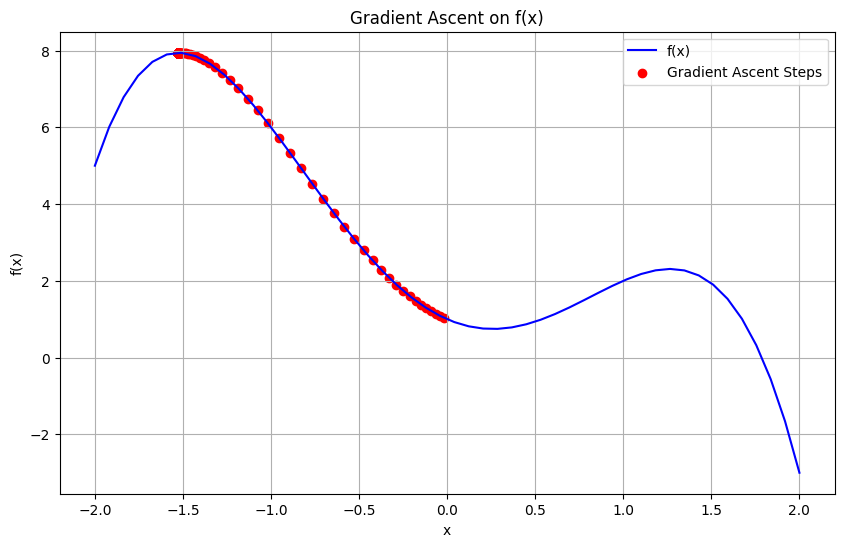

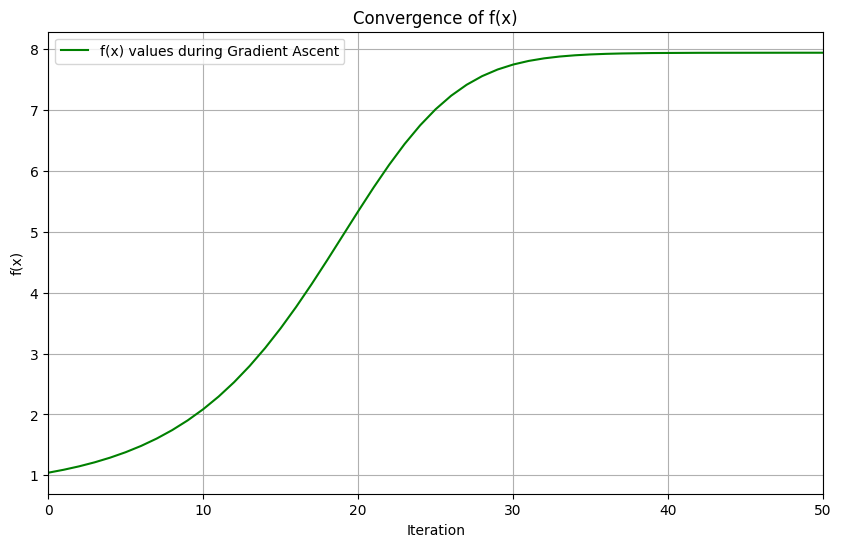

In [24]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return -x**4 + 4 * x**2 - 2 * x + 1

# Gradient ascent using PyTorch
def gradient_ascent_torch(initial_x, learning_rate=0.001, max_iterations=1000, tolerance=1e-6):
    x = torch.tensor(initial_x, requires_grad=True, dtype=torch.float32)
    optimizer = torch.optim.SGD([x], lr=learning_rate)
    f_values = []  # To track the value of f(x) at each iteration
    x_values = []  # To track the value of x at each iteration

    for _ in range(max_iterations):
        optimizer.zero_grad()  # Clear gradients from previous step
        loss = -f(x)  # PyTorch minimizes by default, so negate the function for maximization
        loss.backward()  # Compute gradients
        optimizer.step()

        # Track values for convergence analysis
        f_values.append(f(x).item())
        x_values.append(x.item())

        # Stop if the change is smaller than the tolerance
        if x.grad.abs().item() < tolerance:
            break

    return x.item(), f(x).item(), x_values, f_values

# Parameters
initial_x = 0.0
learning_rate = 0.01
max_iterations = 1000

max_x, max_f, x_values, f_values = gradient_ascent_torch(initial_x, learning_rate, max_iterations)

print(f"Maximum value of f(x): {max_f} at x = {max_x}")

# Plot the function f(x)
x_range = np.linspace(-2, 2)
y_range = [f(x) for x in x_range]

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, label="f(x)", color='blue')
plt.scatter(x_values, [f(x) for x in x_values], color='red', label="Gradient Ascent Steps")
plt.title("Gradient Ascent on f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

# Plot the convergence of f(x)
plt.figure(figsize=(10, 6))
plt.plot(f_values, label="f(x) values during Gradient Ascent", color='green')
plt.xlim(0, 50)
plt.title("Convergence of f(x)")
plt.xlabel("Iteration")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

### b)

Maximized f(x, y, z): -3.0074238777160645 at (x, y, z) = (-0.2951875329017639, -0.599344789981842, 1.448664665222168)


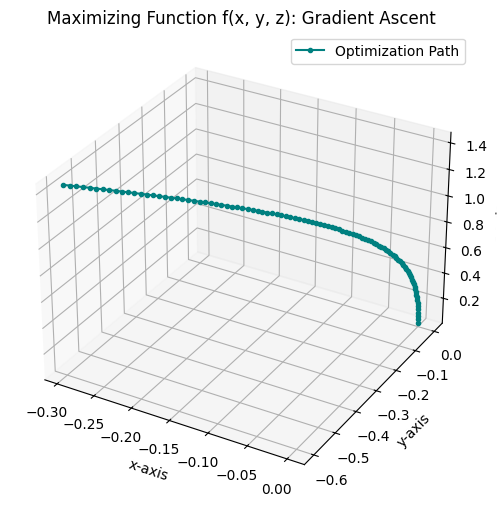

In [25]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def maximize_function_xyz_sgd():
    def compute_function(x, y, z):
        return -x**2 - y**2 - z**2 + 2 * x * y - y * z + 3 * z

    # Initialize parameters and optimizer
    params = torch.tensor([0.0, 0.0, 0.0], requires_grad=True, dtype=torch.float32)
    optimizer = torch.optim.SGD([params], lr=0.01)

    max_iterations = 100
    tolerance = 1e-6

    optimization_path = []
    f_values = []

    # Gradient ascent loop
    for _ in range(max_iterations):
        optimizer.zero_grad()  # Clear previous gradients
        f_value = -compute_function(params[0], params[1], params[2])
        f_value.backward()  # Compute gradients
        optimizer.step()  # Perform gradient ascent step

        # Track optimization path and function values
        optimization_path.append(params.clone().detach().numpy())
        f_values.append(f_value.item())

        # Stopping condition based on change in function value
        if len(f_values) > 1 and abs(f_values[-1] - f_values[-2]) < tolerance:
            break

    # Convert optimization path to NumPy arrays
    optimization_path = np.array(optimization_path)
    x_vals, y_vals, z_vals = optimization_path[:, 0], optimization_path[:, 1], optimization_path[:, 2]

    print(f"Maximized f(x, y, z): {f_values[-1]} at (x, y, z) = ({x_vals[-1]}, {y_vals[-1]}, {z_vals[-1]})")

    # Plot optimization path in 3D
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot(x_vals, y_vals, z_vals, color='teal', marker=".", label="Optimization Path")
    ax.set_title("Maximizing Function f(x, y, z): Gradient Ascent")
    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    ax.set_zlabel("z-axis")
    ax.legend()
    plt.show()

maximize_function_xyz_sgd()

---

## 2. Linear Regression in PyTorch

**Dataset**: Use the following code to generate a synthetic dataset with 100 samples, each with one feature:

```python
import numpy as np
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon
```

**Task**: Implement a linear regression model using PyTorch to predict the target variable $y$. Train the model to minimize the Mean Squared Error (MSE).

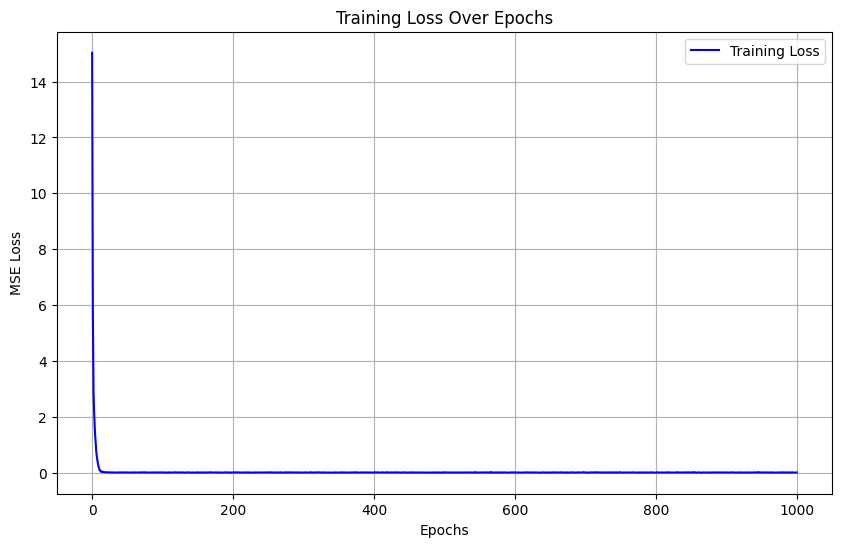

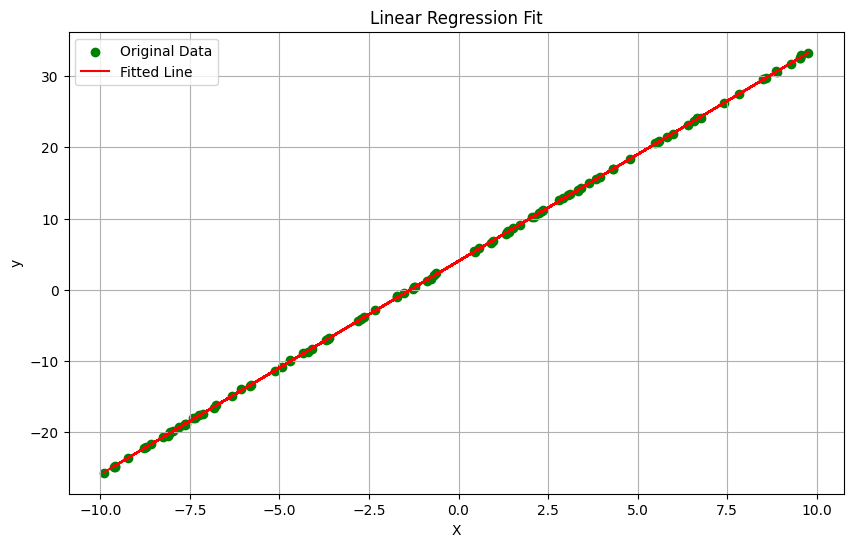

In [26]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Generate the synthetic dataset
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)  # Reshape to (100, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Reshape to (100, 1)

# Create a custom Dataset for PyTorch
class LinearRegressionDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create a Dataset and DataLoader
dataset = LinearRegressionDataset(X_tensor, y_tensor)
data_loader = DataLoader(dataset, batch_size=10, shuffle=True)

# for batch_X, batch_y in data_loader:
#     print("Batch X:", batch_X)
#     print("Batch y:", batch_y)
#     break

class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

# Define the loss function and optimizer
mse_loss_fn = torch.nn.MSELoss()  # Mean Squared Error Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Train the model
epochs = 1000
losses = []

for _ in range(epochs):
    model.train()
    for batch_X, batch_y in data_loader:
        predictions = model(batch_X)
        loss = mse_loss_fn(predictions, batch_y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    # Track loss for visualization
    losses.append(loss.item())

plt.figure(figsize=(10, 6))
plt.plot(range(epochs), losses, label="Training Loss", color='blue')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid()
plt.show()

# Visualize the trained model's predictions
with torch.no_grad():
    predictions = model(X_tensor).numpy()

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Original Data", color='green')
plt.plot(X, predictions, label="Fitted Line", color='red')
plt.title("Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

---

## 3. Learning Rate Analysis

**Dataset**: Use the same dataset from Problem 2.

**Task**: Modify the `gradient_descent()` function to include different learning rates (0.01, 0.1, 1.0). Visualize the convergence behaviors of gradient descent with each learning rate.


---
In my understanding, the `gradient_descent()` function is meant to be our implementation of previous task - so I am modifying it directly below.

Testing Learning Rate: 0.01
Testing Learning Rate: 0.1
Testing Learning Rate: 1.0


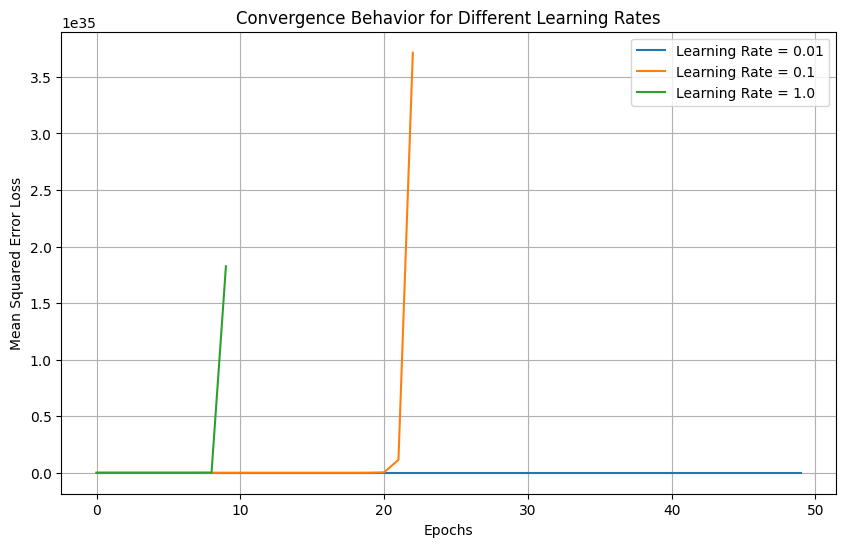

In [27]:
def learning_rate_analysis_debug(learning_rates, epochs=50):
    plt.figure(figsize=(10, 6))

    for lr in learning_rates:
        # Initialize a fresh model, optimizer, and loss tracker for each learning rate
        linear_model = LinearRegressionModel()
        mse_loss_fn = torch.nn.MSELoss()
        optimizer = torch.optim.SGD(linear_model.parameters(), lr=lr)

        print(f"Testing Learning Rate: {lr}")

        # Train the model
        losses = []
        for _ in range(epochs):
            linear_model.train()
            epoch_loss = 0
            for batch_X, batch_y in data_loader:

                predictions = linear_model(batch_X)
                loss = mse_loss_fn(predictions, batch_y)

                loss.backward()
                optimizer.step()
                optimizer.zero_grad()

                epoch_loss += loss.item()

            # Track average loss for the epoch
            avg_loss = epoch_loss / len(data_loader)
            losses.append(avg_loss)

            # print(f"Epoch {epoch + 1}, Loss: {avg_loss:.4f}")

            # Early stop if loss diverges
            # if avg_loss > 1e6:
            #     print(f"Loss diverged at epoch {epoch + 1} for learning rate {lr}")
            #     break

        # Plot loss for the current learning rate
        plt.plot(range(len(losses)), losses, label=f"Learning Rate = {lr}")

    plt.title("Convergence Behavior for Different Learning Rates")
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error Loss")
    plt.legend()
    plt.grid()
    plt.show()

data_loader = DataLoader(dataset, batch_size=100, shuffle=True) # Batch size = 100, because of issues with task 3 - lower batches work for this task, but mess up 3rd task
learning_rates_to_test = [0.01, 0.1, 1.0]
learning_rate_analysis_debug(learning_rates_to_test)

---

## 4. Polynomial Regression Extension

**Dataset**: Use the following code to create a dataset of 100 samples:

```python
np.random.seed(1)
X = np.random.uniform(-5, 5, 100)
epsilon = np.random.normal(0, 0.5, 100)
y = 3 * X**3 - 2 * X**2 + 5 + epsilon
```

**Task**: Implement polynomial regression of degree 3 using PyTorch. Train the model and compare the training loss to that of a simple linear regression model.

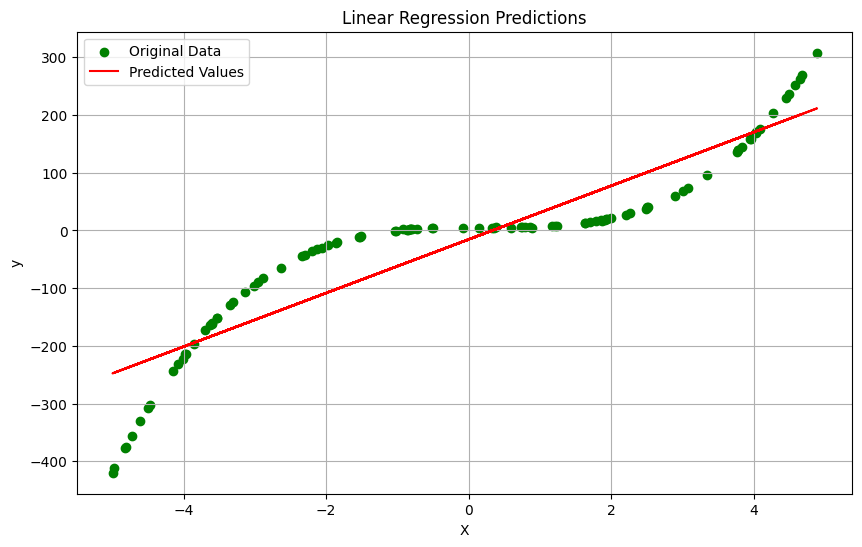

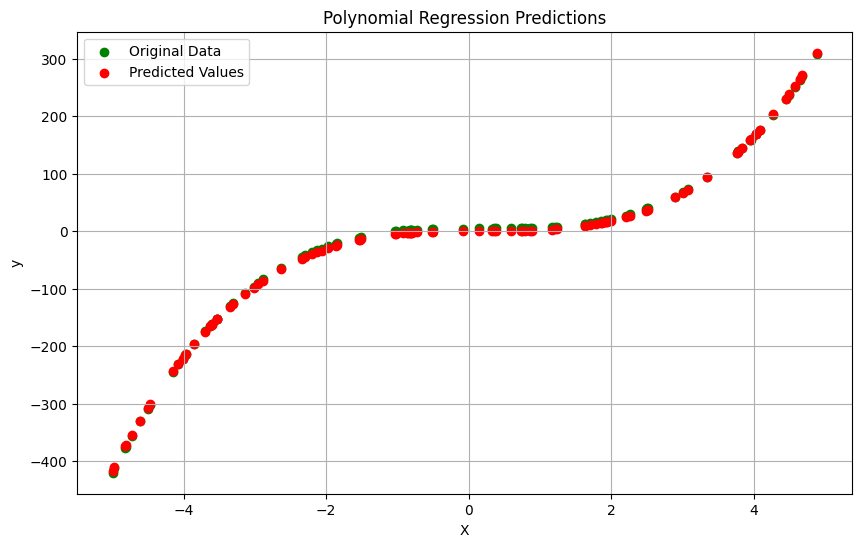

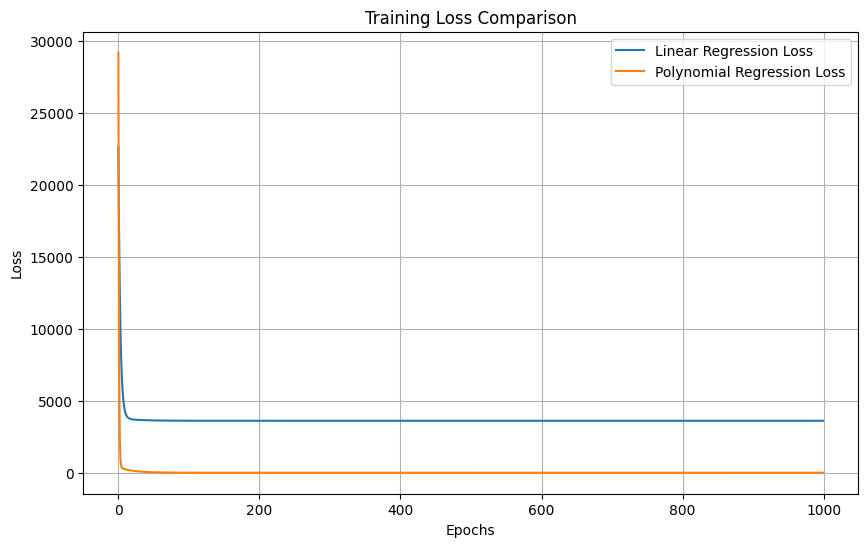

In [28]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Generate the dataset
np.random.seed(1)
X = np.random.uniform(-5, 5, 100)
epsilon = np.random.normal(0, 0.5, 100)
y = 3 * X**3 - 2 * X**2 + 5 + epsilon

# Prepare dataset for polynomial regression
X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
X_poly = np.column_stack((X, X**2, X**3))  # Polynomial features up to 3rd degree
X_poly_tensor = torch.tensor(X_poly, dtype=torch.float32)

class PolynomialRegressionModel(torch.nn.Module):
    def __init__(self, degree):
        super(PolynomialRegressionModel, self).__init__()
        self.poly = torch.nn.Linear(degree, 1)

    def forward(self, x):
        return self.poly(x)

class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

def train_model(model, epochs, learning_rate, is_poly=False):
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    mse_loss_fn = torch.nn.MSELoss()
    losses = []

    for _ in range(epochs):
        model.train()

        predictions = model(X_poly_tensor if is_poly else X_tensor)
        loss = mse_loss_fn(predictions, y_tensor)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        losses.append(loss.item())

    return losses

linear_model = LinearRegressionModel()
poly_model = PolynomialRegressionModel(3)

linear_losses = train_model(linear_model, epochs=1000, learning_rate=0.01, is_poly=False)
poly_losses = train_model(poly_model, epochs=1000, learning_rate=0.0001, is_poly=True)

def plot_predictions(model, is_poly=False, title="Regression Results"):
    model.eval()
    with torch.no_grad():
        predictions = model(X_poly_tensor if is_poly else X_tensor)

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='green', label='Original Data')
    if is_poly:
      plt.scatter(X, predictions.numpy(), color='red', label='Predicted Values')
    else:
      plt.plot(X, predictions.numpy(), color='red', label='Predicted Values')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid()
    plt.show()

plot_predictions(linear_model, is_poly=False, title="Linear Regression Predictions")
plot_predictions(poly_model, is_poly=True, title="Polynomial Regression Predictions")

plt.figure(figsize=(10, 6))
plt.plot(linear_losses, label="Linear Regression Loss")
plt.plot(poly_losses, label="Polynomial Regression Loss")
plt.title("Training Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

---

## 5. Overfitting and Regularization

**Dataset**: Use the following code to generate a dataset with 150 samples:

```python
np.random.seed(2)
X = np.random.uniform(-10, 10, 150)
epsilon = np.random.normal(0, 1, 150)
y = 2 * X**2 + 3 * X + 1 + epsilon
```

**Task**: Fit two models: (i) a linear regression model, and (ii) a polynomial regression model of degree 10. Compare the training and validation performance of both models. Apply L2 regularization to the polynomial model and observe the effect on overfitting.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.64477e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.12496e-44): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


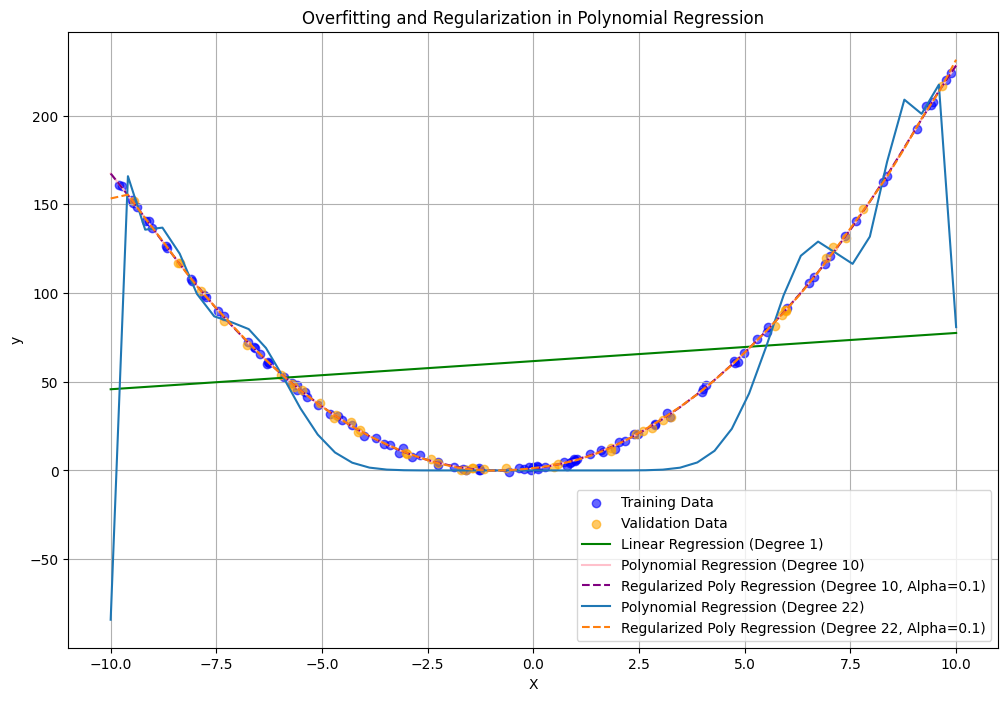

Performance Comparison:
Linear Regression - Training MSE: 3675.3672, Validation MSE: 2573.0474
Polynomial Regression - Training MSE: 0.8236, Validation MSE: 1.5015
Regularized Polynomial Regression - Training MSE: 0.8237, Validation MSE: 1.5004
Polynomial Regression (Degree 22) - Training MSE: 213.2189, Validation MSE: 177.7874
Regularized Polynomial Regression (Degree 22) - Training MSE: 0.7567, Validation MSE: 1.5717


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split

# Generate the dataset
np.random.seed(2)
X = np.random.uniform(-10, 10, 150)
epsilon = np.random.normal(0, 1, 150)
y = 2 * X**2 + 3 * X + 1 + epsilon

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Expand the dataset to include polynomial features
def create_polynomial_features(x, degree):
    return np.column_stack([x**i for i in range(degree + 1)])

# Define models
# Linear Regression (degree 1)
linear_model = LinearRegression(fit_intercept=False)
X_train_linear = create_polynomial_features(X_train, degree=1)
X_val_linear = create_polynomial_features(X_val, degree=1)

# Polynomial Regression (degree 10)
degree = 10
# degree = 22 # We can see overfitting on higher degrees
X_train_poly = create_polynomial_features(X_train, degree=degree)
X_val_poly = create_polynomial_features(X_val, degree=degree)

poly_model = LinearRegression(fit_intercept=False)

# Regularized Polynomial Regression (degree 10, L2 regularization)
alpha = 0.1
regularized_model = Ridge(alpha=alpha, fit_intercept=False)

# Fit models
linear_model.fit(X_train_linear, y_train)
poly_model.fit(X_train_poly, y_train)
regularized_model.fit(X_train_poly, y_train)

# Predictions
X_plot = np.linspace(-10, 10)
X_plot_poly = create_polynomial_features(X_plot, degree=degree)

y_pred_linear = linear_model.predict(create_polynomial_features(X_plot, degree=1))
y_pred_poly = poly_model.predict(X_plot_poly)
y_pred_regularized = regularized_model.predict(X_plot_poly)

#----------------------
# Polynomial Regression (degree 22)
degree_22 = 22
X_train_poly_22 = create_polynomial_features(X_train, degree=degree_22)
X_val_poly_22 = create_polynomial_features(X_val, degree=degree_22)

# Polynomial Regression (degree 22)
poly_model_22 = LinearRegression(fit_intercept=False)
poly_model_22.fit(X_train_poly_22, y_train)

# Regularized Polynomial Regression (degree 22)
alpha_22 = 0.1
regularized_model_22 = Ridge(alpha=alpha_22, fit_intercept=False)
regularized_model_22.fit(X_train_poly_22, y_train)

# Predictions
X_plot_poly_22 = create_polynomial_features(X_plot, degree=degree_22)
y_pred_poly_22 = poly_model_22.predict(X_plot_poly_22)
y_pred_regularized_22 = regularized_model_22.predict(X_plot_poly_22)
#------------------------

# Visualize results
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Training Data')
plt.scatter(X_val, y_val, color='orange', alpha=0.6, label='Validation Data')

# Plot predictions
plt.plot(X_plot, y_pred_linear, label="Linear Regression (Degree 1)", color="green")
plt.plot(X_plot, y_pred_poly, label=f"Polynomial Regression (Degree {degree})", color="pink")
plt.plot(X_plot, y_pred_regularized, label=f"Regularized Poly Regression (Degree {degree}, Alpha={alpha})", linestyle="--", color="purple")
plt.plot(X_plot, y_pred_poly_22, label=f"Polynomial Regression (Degree {degree_22})")
plt.plot(X_plot, y_pred_regularized_22, label=f"Regularized Poly Regression (Degree {degree_22}, Alpha={alpha_22})", linestyle="--")

plt.title("Overfitting and Regularization in Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

# Compare Training and Validation Performance
def compute_mse(model, X, y):
    predictions = model.predict(X)
    return np.mean((y - predictions)**2)

print("Performance Comparison:")
print(f"Linear Regression - Training MSE: {compute_mse(linear_model, X_train_linear, y_train):.4f}, Validation MSE: {compute_mse(linear_model, X_val_linear, y_val):.4f}")
print(f"Polynomial Regression - Training MSE: {compute_mse(poly_model, X_train_poly, y_train):.4f}, Validation MSE: {compute_mse(poly_model, X_val_poly, y_val):.4f}")
print(f"Regularized Polynomial Regression - Training MSE: {compute_mse(regularized_model, X_train_poly, y_train):.4f}, Validation MSE: {compute_mse(regularized_model, X_val_poly, y_val):.4f}")
print(f"Polynomial Regression (Degree 22) - Training MSE: {compute_mse(poly_model_22, X_train_poly_22, y_train):.4f}, Validation MSE: {compute_mse(poly_model_22, X_val_poly_22, y_val):.4f}")
print(f"Regularized Polynomial Regression (Degree 22) - Training MSE: {compute_mse(regularized_model_22, X_train_poly_22, y_train):.4f}, Validation MSE: {compute_mse(regularized_model_22, X_val_poly_22, y_val):.4f}")

---

## 6. Custom Gradient Descent in PyTorch

**Dataset**: Use the same dataset from Problem 2.

**Task**: Implement a custom gradient descent algorithm without using an optimizer from `torch.optim`. Train a linear regression model using this custom implementation and compare the training results with those obtained using PyTorch's `SGD` optimizer.

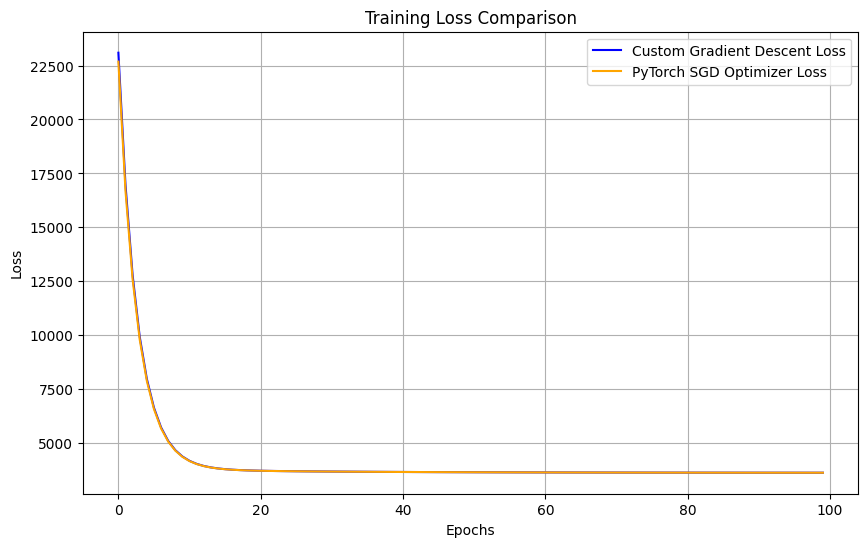

Custom Gradient Descent - Weight: 46.47736358642578, Bias: -13.710461616516113
PyTorch SGD Optimizer - Weight: 46.47704315185547, Bias: -13.727882385253906


In [30]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class CustomLinearRegressionModel(nn.Module):
    def __init__(self):
        super(CustomLinearRegressionModel, self).__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True))  # Weight
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))    # Bias

    def forward(self, x):
        return self.weight * x + self.bias

def custom_gradient_descent_train(model, X, y, learning_rate, epochs):
    mse_loss_fn = nn.MSELoss()  # Mean Squared Error Loss
    losses = []

    for _ in range(epochs):
        model.train()

        predictions = model(X)
        loss = mse_loss_fn(predictions, y)

        loss.backward()

        # Manual update
        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad
        model.zero_grad()

        losses.append(loss.item())

    return losses

# Train with custom gradient descent
custom_model = CustomLinearRegressionModel()
learning_rate = 0.01
epochs = 100
custom_losses = custom_gradient_descent_train(custom_model, X_tensor, y_tensor, learning_rate, epochs)

# Train with PyTorch SGD
sgd_model = nn.Linear(1, 1, bias=True)  # PyTorch linear model
optimizer = torch.optim.SGD(sgd_model.parameters(), lr=learning_rate)
mse_loss_fn = nn.MSELoss()
sgd_losses = []

for epoch in range(epochs):
    predictions = sgd_model(X_tensor)
    loss = mse_loss_fn(predictions, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Record the loss
    sgd_losses.append(loss.item())

plt.figure(figsize=(10, 6))
plt.plot(custom_losses, label="Custom Gradient Descent Loss", color="blue")
plt.plot(sgd_losses, label="PyTorch SGD Optimizer Loss", color="orange")
plt.title("Training Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

print(f"Custom Gradient Descent - Weight: {custom_model.weight.item()}, Bias: {custom_model.bias.item()}")
print(f"PyTorch SGD Optimizer - Weight: {sgd_model.weight.item()}, Bias: {sgd_model.bias.item()}")

---

## 7. Dataset Size and Convergence

**Dataset**: Use the following code to create three datasets of sizes 50, 100, and 500 samples:

```python
np.random.seed(3)
sizes = [50, 100, 500]
datasets = []
for size in sizes:
    X = np.random.uniform(-10, 10, size)
    epsilon = np.random.normal(0, 0.2, size)
    y = 4 * X - 3 + epsilon
    datasets.append((X, y))
```

**Task**: Train linear regression models on each dataset using PyTorch. Compare the convergence rates of gradient descent for each dataset size by plotting the training loss over epochs.

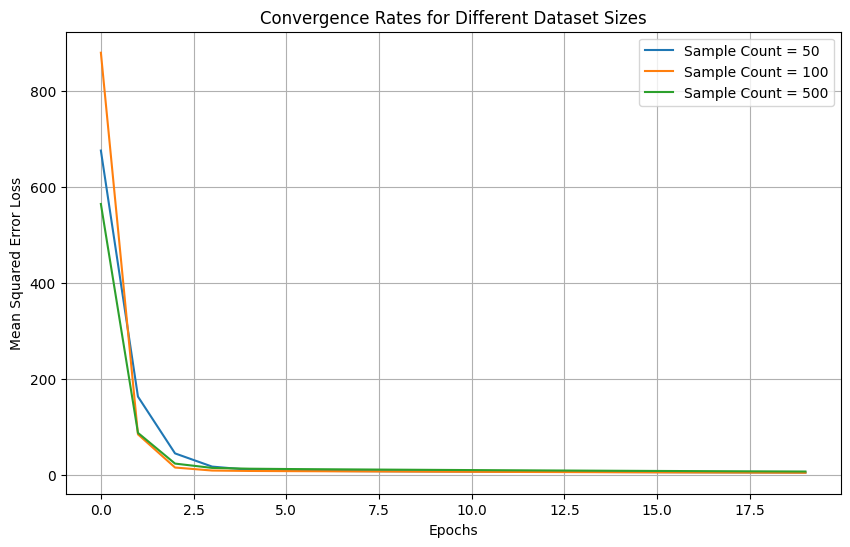

In [31]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Dataset Preparation
np.random.seed(3)
sizes = [50, 100, 500]
datasets = []

for size in sizes:
    X = np.random.uniform(-10, 10, size)
    epsilon = np.random.normal(0, 0.2, size)
    y = 4 * X - 3 + epsilon
    datasets.append((X, y))

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

def train_model_with_dataset(X, y, lr=0.01, epochs=20):
    # Convert dataset to PyTorch tensors
    X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
    y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

    # Initialize model, loss function, and optimizer
    linear_model = LinearRegressionModel()
    mse_loss_fun = nn.MSELoss()
    optimizer = torch.optim.SGD(linear_model.parameters(), lr=lr)

    losses = []

    for _ in range(epochs):
        linear_model.train()

        predictions = linear_model(X_tensor)
        mse_loss = mse_loss_fun(predictions, y_tensor)

        mse_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Track losses
        losses.append(mse_loss.item())

    return losses

# Train models and compare convergence
def compare_convergence(dataset, sizes, lr=0.01, epochs=20):
    plt.figure(figsize=(10, 6))

    for (data_x, data_y), size_label in zip(dataset, sizes):
        # Train and log the loss progression
        loss_history = train_model_with_dataset(data_x, data_y, lr, epochs)

        # Visualization of loss trends
        plt.plot(loss_history, label=f'Sample Count = {size_label}')

    plt.title("Convergence Rates for Different Dataset Sizes")
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error Loss")
    plt.legend()
    plt.grid()
    plt.show()

compare_convergence(datasets, sizes, lr=0.01, epochs=20)

---

## 8. Effect of Model Complexity on Overfitting

**Dataset**: Use the following code to generate a dataset of 200 samples:
```python
np.random.seed(4)
X = np.random.uniform(-5, 5, 200)
epsilon = np.random.normal(0, 0.5, 200)
y = 2 * X**2 + X + epsilon
```

**Task**: Fit polynomial regression models of degrees 5 and 15 to the dataset. Plot the training and validation errors for both models.

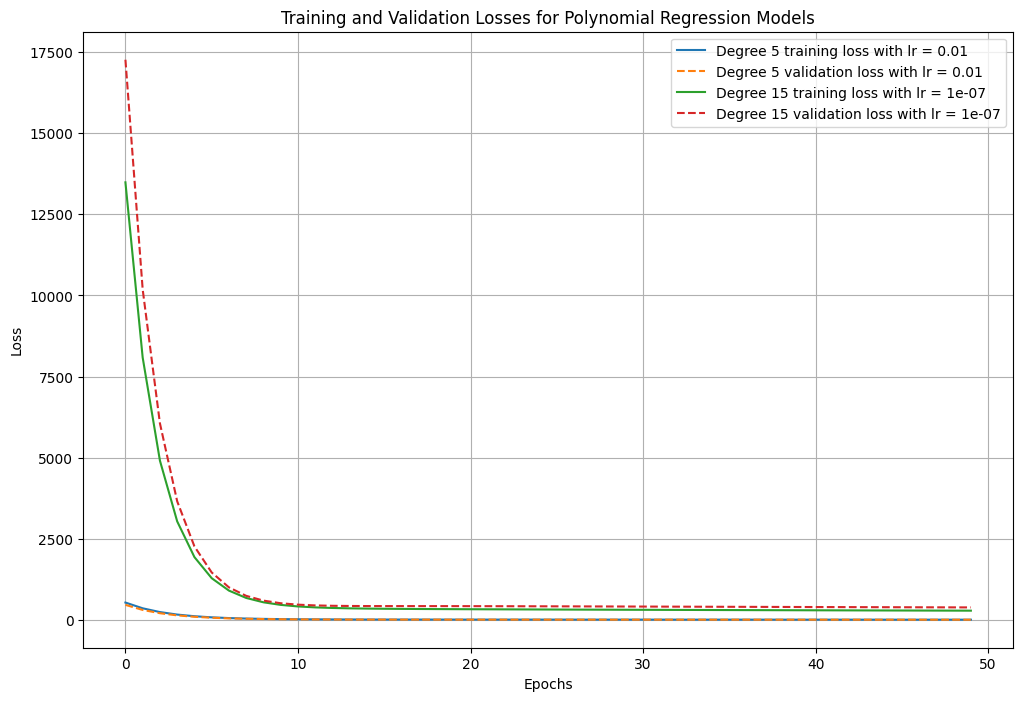

In [32]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate dataset
np.random.seed(4)
X = np.random.uniform(-5, 5, 200)
epsilon = np.random.normal(0, 0.5, 200)
y = 2 * X**2 + X + epsilon

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1)).flatten()
# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Function to generate polynomial features
def generate_features(data, max_degree):
    return torch.tensor(
        np.column_stack([data**i for i in range(max_degree + 1)]),
        dtype=torch.float32,
    )

# Define the Polynomial Regression Model
class PolynomialRegressionModel(nn.Module):
    def __init__(self, degree):
        super().__init__()
        self.regressor = nn.Linear(degree + 1, 1)

    def forward(self, x):
        return self.regressor(x)

# Function to train multiple models for different polynomial degrees
def train_multiple_models(degrees, X_train, y_train, X_val, y_val, epochs, learning_rates):
    models = {}  # Store models for each degree
    losses = {"train": {}, "val": {}}  # Store loss histories for each degree

    for degree in degrees:
        # Generate polynomial features
        X_train_poly = generate_features(X_train, degree)
        X_val_poly = generate_features(X_val, degree)
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
        y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

        # Initialize model, optimizer, and loss function
        model = PolynomialRegressionModel(degree)
        lr = learning_rates.get(degree, 0.001)
        optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=1e-3)
        mse_loss_fn = nn.MSELoss()

        train_losses = []
        val_losses = []

        # Training loop
        for _ in range(epochs):
            model.train()
            optimizer.zero_grad()
            train_preds = model(X_train_poly)
            loss = mse_loss_fn(train_preds, y_train_tensor)
            loss.backward()
            optimizer.step()

            # Validation phase
            model.eval()
            with torch.no_grad():
                val_preds = model(X_val_poly)
                val_loss = mse_loss_fn(val_preds, y_val_tensor)

            # Log losses
            train_losses.append(loss.item())
            val_losses.append(val_loss.item())

        # Save the model and losses
        models[degree] = model
        losses["train"][degree] = train_losses
        losses["val"][degree] = val_losses

    return models, losses

degrees_to_test = [5, 15]
learning_rates = {
    5: 1e-2,
    15: 1e-7,
}
total_epochs = 50

models, loss_histories = train_multiple_models(
    degrees_to_test, X_train, y_train, X_val, y_val, total_epochs, learning_rates
)

plt.figure(figsize=(12, 8))
for degree in degrees_to_test:
    plt.plot(loss_histories["train"][degree], label=f"Degree {degree} training loss with lr = {learning_rates.get(degree)}")
    plt.plot(loss_histories["val"][degree], linestyle="--", label=f"Degree {degree} validation loss with lr = {learning_rates.get(degree)}")

plt.title("Training and Validation Losses for Polynomial Regression Models")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

---

## 9. Gradient Descent for Non-linear Data

**Dataset**: Use the following code to generate a dataset of 100 samples:
```python
np.random.seed(5)
X = np.random.uniform(-2 * np.pi, 2 * np.pi, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = np.sin(X) + epsilon
```
**Task**: Implement gradient descent to fit a linear model to this dataset. Discuss the challenges and limitations of fitting a linear model to non-linear data.

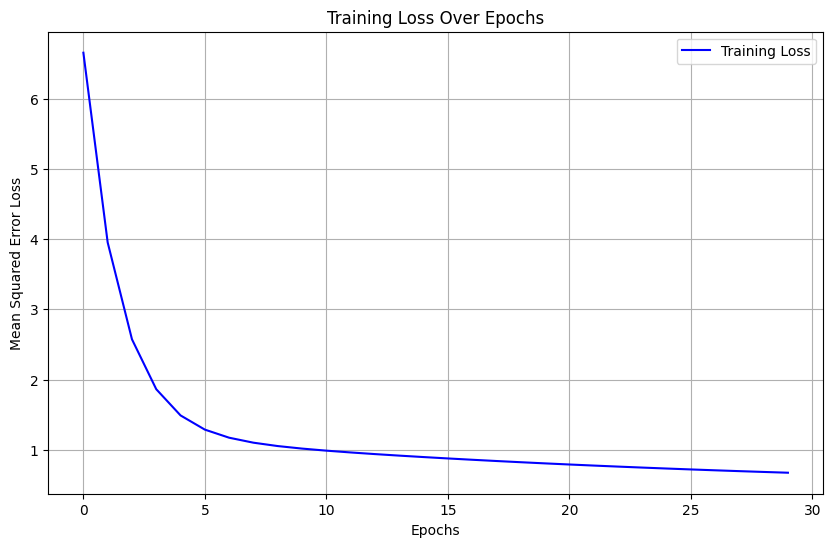

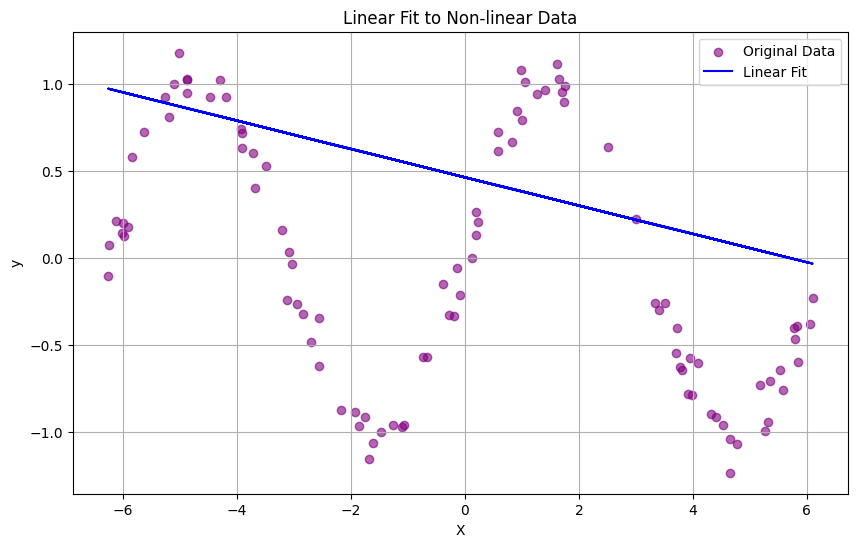

Learned Weight: -0.08120344579219818
Learned Bias: 0.4628069996833801


In [33]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Generate dataset
np.random.seed(5)
X = np.random.uniform(-2 * np.pi, 2 * np.pi, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = np.sin(X) + epsilon

# Convert dataset to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Define a linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

linear_model = LinearRegressionModel()
learning_rate = 0.01
epochs = 30
mse_loss_fn = nn.MSELoss()
epoch_losses = []

# Custom gradient descent training loop
for _ in range(epochs):
    linear_model.train()

    predictions = linear_model(X_tensor)
    loss = mse_loss_fn(predictions, y_tensor)

    loss.backward()

    # Update weights manually
    with torch.no_grad():
        for param in linear_model.parameters():
            param -= learning_rate * param.grad

    linear_model.zero_grad()  # Reset gradients
    epoch_losses.append(loss.item())

# Function to plot training losses
def plot_losses(loss_values, title="Training Loss Over Epochs", xlabel="Epochs", ylabel="Mean Squared Error Loss"):
    plt.figure(figsize=(10, 6))
    plt.plot(loss_values, label="Training Loss", color="blue")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.show()

# Function to plot model predictions
def plot_model_predictions(model, X_tensor, X_data, y_data, title="Linear Fit to Non-linear Data"):
    model.eval()
    with torch.no_grad():
        predictions = model(X_tensor)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_data, y_data, label="Original Data", color="purple", alpha=0.6)
    plt.plot(X_data, predictions.numpy(), label="Linear Fit", color="blue")
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid()
    plt.show()

# Display learned parameters
def display_model_parameters(model):
    weight = model.linear.weight.item()
    bias = model.linear.bias.item()
    print(f"Learned Weight: {weight}")
    print(f"Learned Bias: {bias}")

plot_losses(epoch_losses)
plot_model_predictions(linear_model, X_tensor, X, y)
display_model_parameters(linear_model)

A linear model can only represent straight-line relationships, leading to high bias and underfitting when approximating complex patterns.

Even with proper gradient descent and reduced training loss, the model cannot capture the nature of the data, resulting in poor predictions.

This demonstrates that linear models are unsuitable for non-linear relationships, and more flexible approaches, such as polynomial regression, are needed for better performance.